In [1]:
''' 
 Author: Yoonhyuck WOO / JBNU_Industrial Information system Engineering
 Date; 1. 8. 2020 - 2. 5. 2021
 Title: Artificial Intelligence_Project 2
 Professor: Seung-Hoon Na'''
            
import numpy as np
import random
import matplotlib.pyplot as plt

In [10]:
# 2.1 Linear regression을 위한 식 유도 (행렬에 대한 미분공식 이용)
np.random.seed(0)
w_row=random.randrange(2,4)
w_col=random.randrange(2,4)
x_col=random.randrange(2,4)

w=np.random.randint(-7,7,(w_row,w_col))
w_T=np.transpose(w)
x=np.random.randint(-7,7,(w_row,x_col))
bias=np.random.randint(0,1,(x_col,1))
bias=np.ones_like(bias)

print(w)
print('\n',w_T)
print('\n',x)
print('\n',bias)

# 2.1-1 

[[ 5 -2 -7]
 [-4  4 -4]]

 [[ 5 -4]
 [-2  4]
 [-7 -4]]

 [[ 0  2]
 [-4 -2]]

 [[1]
 [1]]


# 2.2 Stochastic Gradient Descent (SGD) Method with Minibatch

In [2]:
matrix= [[1,2,3],[2,2,3],[3,2,3],[4,2,3],[5,2,3],[6,2,3],[7,2,3],[8,2,3],[9,2,3]]
matrix=np.array(matrix)
y = [[1],[1],[1],[1],[1],[1],[1],[1],[1]]
y=np.array(y)
w = [[1],[1],[1]]
w=np.array(w)
B = np.random.randint(1,2,(1,1))
weights = {'W':w,'B':B} 

loss_grad={}    # dJdW, dJdB 저장공간
forward_info={} # 순방향 저장공간


def loss_gradient(X_batch, y_batch, weights):
    assert X_batch.shape[0] == y_batch.shape[0]
    assert X_batch.shape[1] == weights['W'].shape[0]
    assert weights['B'].shape[0] == weights['B'].shape[1]==1
    
    N=np.dot(X_batch,weights['W'])
    f= N+weights['B']
    loss=np.sum(np.power(y_batch-f,2))
    
    print('N \n',N)
    print('f \n',f)
    print('Loss:',loss)
    
    #순방향으로 갈때 중간값을 저장해가면서 진행
    forward_info['X']= X_batch
    forward_info['N']= N       # 
    forward_info['f']= f       # 예측값
    forward_info['y']= y_batch # 실제값

    # 전체코드로 본 도함수 계산과정

    batch_size=forward_info['X'].shape[0]
    dJdf=-2*(forward_info['y']-forward_info['f'])
    '''a(N,B)=N+B. N의 어떤 요소를 1단위 증가시키면 f의 값 역시 1단위 증가 따라서  
    dfdN의 모든 요소값이 1인 행렬이 되는 것'''  
    dfdN=np.ones_like(forward_info['N']) 
    dfdB=np.ones_like(forward_info['N'])
    dJdN=dJdf*dfdN # 뒷계산을 위한 중간 계산
    '''
       3X1 과 3X1을 어떻게 곱해지는지 이해가 안됐지만 그 이유가 '*'와 'np.dot'의 차이를 알아야한다.
       어짜피 연쇄법칙으로 쭉 곱해가면서 가야하는데 위의 식을 곱하기 위해선 무조건 행렬이라고
       dot의 개념을 곱하면 안되고 똑같이 곱하되 numpy.array의 성질을 이용(같은 열과 같은 행이면
       위와 같이 곱해됨)한다.
       그래서 위에서는 '*'을 이용했지만 밑에서는 np.dot을 이용한다(즉, 곱해야 하는 행렬의 꼴을 봐가면서 
       '*' 혹은 'np.dot'을 이용하면 된다고 판단. 허나 만약 이도저도 안된다면....이 아니라 만약 그렇다면
       아마 이 계산과정 자체가 나오지 않았을 것) '''
    dNdW=np.transpose(forward_info['X'],(1,0))
    
    
    dJdW=np.dot(dNdW, dJdN)
    dLdB=(dJdf*dfdB).sum(axis=0)

    
    loss_grad['W']=dJdW
    loss_grad['B']=dLdB

            
    return print(loss_grad)

#loss_gradient(matrix,y,weights)

print('==================================================================')

print('batch gradient descent')
def batch(loss_grad):
    for i in range(1,4):
        print('\n')
        print(i,'회 반복')
        for key in weights.keys():
            print('before')
            print(weights[key])
            weights[key] = weights[key]- 0.001 * loss_grad[key]
            print('after')
            print(weights[key])
#batch(loss_grad)

print('=============')

minibatch_size = 3
number_minibatch= np.int(np.ceil(matrix.shape[0]/minibatch_size))

for i in range(1, number_minibatch+1):
    print('\n',minibatch_size*i-(minibatch_size-1)-1,'~',minibatch_size*i-1,'열')
    matrix1=matrix[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
    y1=y[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
    loss_gradient(matrix1,y1,weights)
    
    for key in weights.keys():
        print(key)
        print('before')
        print(weights[key])
        weights[key]=weights[key]- 0.001 * loss_grad[key]
        print('after')
        print(weights[key])
        print('\n')
    print('=================================')    

batch gradient descent

 0 ~ 2 열
N 
 [[6]
 [7]
 [8]]
f 
 [[7]
 [8]
 [9]]
Loss: 149
{'W': array([[ 88],
       [ 84],
       [126]]), 'B': array([42])}
W
before
[[1]
 [1]
 [1]]
after
[[0.912]
 [0.916]
 [0.874]]


B
before
[[1]]
after
[[0.958]]



 3 ~ 5 열
N 
 [[8.102]
 [9.014]
 [9.926]]
f 
 [[ 9.06 ]
 [ 9.972]
 [10.884]]
Loss: 243.15384
{'W': array([[272.808],
       [107.664],
       [161.496]]), 'B': array([53.832])}
W
before
[[0.912]
 [0.916]
 [0.874]]
after
[[0.639192]
 [0.808336]
 [0.712504]]


B
before
[[0.958]]
after
[[0.904168]]



 6 ~ 8 열
N 
 [[8.228528]
 [8.86772 ]
 [9.506912]]
f 
 [[ 9.132696]
 [ 9.771888]
 [10.41108 ]]
Loss: 231.65519007936
{'W': array([[423.607392],
       [105.262656],
       [157.893984]]), 'B': array([52.631328])}
W
before
[[0.639192]
 [0.808336]
 [0.712504]]
after
[[0.21558461]
 [0.70307334]
 [0.55461002]]


B
before
[[0.904168]]
after
[[0.85153667]]




# 2.4 Linear regression 구현

1. 시간 혹은 비용 문제로 전수 조사를 못한 상황에서 표본 조사를 해야 할 때, <br>
2. 기계학습을 할 때 데이터셋을 훈련용/검증용/테스트용으로 샘플링 할 때, <br>
3. 다양한 확률 분포로 부터 데이터를 무작위로 생성해서 시뮬레이션(simulation) 할 때 <br> 
   => 사용할 수 있는 무작위 난수 만들기(generating random numbers, random sampling)를 이용한다.<br>

※Python NumPy는 매우 빠르고 효율적으로 무작위 샘플을 만들 수 있는 numpy.random 모듈을 제공합니다. <br>
<br>
얼마나 신기하냐면<br>
random 모듈안에 이산형, 연속형 분포를 따르는 확률분포들이 있는데, 해당 분포에 맞는 parameter를 설정해주면 
파이썬이 알아서 해당 확률분포를 따르는 난수를 출력해주는 것이다.<br>

출처: https://rfriend.tistory.com/284 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

- #2.4.1 랜덤 데이터 생성기 구현: Gaussian 분포에 기반 N=1000,10000,1000000

NameError: name 'result' is not defined

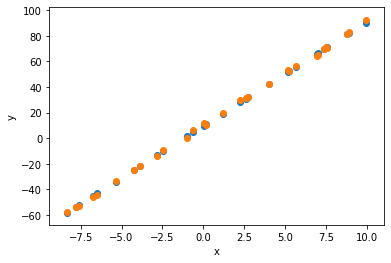

In [8]:
xlis = []
ylis = []
flis = [] 
wlis = []

def data_set(R,size):
    #size==특징의 개수
    W= np.random.uniform(-R,R,size=size)
    b= np.random.uniform(-R,R,size=size)
    b= random.choice(b)

    for i in range(30):
        x = np.random.uniform(-R,R,size=size)
        y = np.random.normal(W*x+b,1,size=size)
        xlis.append(x)
        ylis.append(y)
        flis.append(W*x+b)

    x=np.array(xlis)
    y=np.array(ylis)

    result = np.concatenate((x,y),axis=1)

        
data_set(10,1)
plt.scatter(xlis,flis)
plt.scatter(xlis,ylis)
plt.xlabel('x')
plt.ylabel('y')

train_idx=int(result.shape[0]*0.6)
dev_idx=int(result.shape[0]*0.1)
test_idx=int(result.shape[0]*0.3)

train_data_set=result[0:train_idx,:]
test_data_set=result[train_idx:train_idx+test_idx,:]
dev_data_set=result[train_idx+test_idx:train_idx+test_idx+dev_idx,:]

print(test_data_set)
test_data_set=np.random.permutation(test_data_set)
print(test_data_set)

#print(result[:,0])

In [13]:
# 2.4.2 scikit sample: Diabetes

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# 2.4.3 Linear regression(Random data_set)

In [7]:
''' w,b를 찾아 가는 것. x와 y는 한세트라고 보면 된다
    따라서, 셔플을 할 때 x와y로 이루어진 하나의 셋에 셔플을 주는 것이다.'''
def data_set(R,size):
  #  R=int(input('range: '))
 #   dimension_size=int(input('size: '))
#    sample=int(input('sample: '))

    xlis = []
    ylis = []
    wlis = []
    
    W= np.random.uniform(-R,R,size=size) #size==특징
    b= np.random.uniform(-R,R,size=size)
    b= random.choice(b)
    
    mu=W*x+b
    sigma=0.1*R

    for i in range(10):
        x = np.random.uniform(-R,R,size=size)
        y = np.random.normal(mu,sigma,size=size)
        xlis.append(x)
        ylis.append(y)
    
x1=np.array(xlis)
y1=np.array(ylis)

'''
plt.scatter(xlis,ylis)
plt.xlabel('x')
plt.ylabel('y')'''

def loss(X_batch, y_batch, W, b):
    
    loss_grad={}    # dJdW, dJdB 저장공간
    forward_info={} # 순방향 저장공간
    weights = {'W':W,'B':b} 

    assert X_batch.shape[0] == y_batch.shape[0]
    assert X_batch.shape[1] == weights['W'].shape[0]

    N=np.dot(np.transpose(X_batch),weights['W'])
    f= N+weights['B']
    loss=np.mean(np.power(y_batch-f,2))
    
    return loss


def loss_gradient(X_batch, y_batch, W, b):
    loss(X_batch, y_batch, W, b)
    
    #순방향으로 갈때 중간값을 저장해가면서 진행
    forward_info['X']= X_batch
    forward_info['N']= N       # 
    forward_info['f']= f       # 예측값
    forward_info['y']= y_batch # 실제값

    # 전체코드로 본 도함수 계산과정
    batch_size=forward_info['X'].shape[0]
    dJdf=-2*(forward_info['y']-forward_info['f'])
    dfdN=np.ones_like(forward_info['N']) 
    dfdB=np.ones_like(forward_info['N'])
    dJdN=dJdf*dfdN 
    dNdW=np.transpose(forward_info['X'],(1,0))

    dJdW=np.dot(dNdW, dJdN)
    dLdB=(dJdf*dfdB).sum(axis=0)

    loss_grad['W']=dJdW
    loss_grad['B']=dLdB
    
    print('==================================================================')
    number_minibatch= np.int(np.ceil(X_batch.shape[0]/minibatch_size))
    print(number_minibatch)
    
    for j in range(1,epoch_size+1):
        print('*******',j,'번차 epoch*******')
        for i in range(1, number_minibatch+1):
            print('\n',minibatch_size*i-(minibatch_size-1)-1,'~',minibatch_size*i-1,'열')
            X_batch1=X_batch[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
            y1=y[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]

            for key in weights.keys():
                weights[key]=weights[key]- 0.0001 * loss_grad[key]
                
                
            print(loss)
            print('=================================')
             #print(loss_grad)

while 1:
    minibatch_size=int(input('미니배치 사이즈를 입력(10~100):'))
    epoch_size=int(input('epoch size(최대 100):'))
    if((10<=minibatch_size <=100) and 1<=epoch_size<=100):
        loss_gradient(train_data_x,train_data_y,train_data_W,train_data_b)
        break
    else:
        if(10>=minibatch_size and minibatch_size >=100 and 1<=epoch_size<=100):
            print('Out of order about minibatch_size')
        elif((10<=minibatch_size <=100) and (0>epoch_size and epoch_size >=100)):
            print('Out of order about epoch_size')
        else: print('Out of order both')
        continue

미니배치 사이즈를 입력(10~100): 30
epoch size(최대 100): 3


NameError: name 'train_data_x' is not defined

In [ ]:
# 2.4.3 Linear regression 학습기 Practice

W= np.random.uniform(-10,10,size=1000)
b= np.random.uniform(-10,10,size=1000)
x= np.random.uniform(-10,10,size=1000)

W=np.reshape(W,(1000,1))
b=np.reshape(b,(1000,1))
x=np.reshape(x,(1000,1))

train_data_W = W[0:850,:]
dev_data_W = W[850:860,:]
test_data_W = W[900:1000,:]

train_data_x = x[0:850,:]
dev_data_x = x[850:860,:]
test_data_x = x[900:1000,:]

train_data_b = b[0:850,:]
dev_data_b = b[850:860,:]
test_data_b = b[900:1000,:]

train_data_mu=np.dot(np.transpose(train_data_W),train_data_x)+train_data_b
dev_data_mu=np.dot(np.transpose(dev_data_W),dev_data_x)+dev_data_b
test_data_mu=np.dot(np.transpose(test_data_W),test_data_x)+test_data_b

sigma=0.1*10

train_data_y=np.random.normal(train_data_mu,sigma,size=850)
dev_data_y=np.random.normal(dev_data_mu,sigma,size=10)
test_data_y=np.random.normal(test_data_mu,sigma,size=100)

train_data_y=np.reshape(train_data_y,(850,1))
dev_data_y=np.reshape(dev_data_y,(10,1))
test_data_y=np.reshape(test_data_y,(100,1))

loss_grad={}    # dJdW, dJdB 저장공간
forward_info={} # 순방향 저장공간

def loss_gradient(X_batch, y_batch, W, b, minibatch_size, epoch_size):    
    weights = {'W':W,'B':b} 

    assert X_batch.shape[0] == y_batch.shape[0]
    assert X_batch.shape[0] == weights['W'].shape[0]


    N=np.dot(np.transpose(X_batch),weights['W'])
    f= N+weights['B']
    loss=np.mean(np.power(y_batch-f,2))

    #순방향으로 갈때 중간값을 저장해가면서 진행
    forward_info['X']= X_batch
    forward_info['N']= N       # 
    forward_info['f']= f       # 예측값
    forward_info['y']= y_batch # 실제값

    # 전체코드로 본 도함수 계산과정
    batch_size=forward_info['X'].shape[0]
    dJdf=-2*(forward_info['y']-forward_info['f'])
    dfdN=np.ones_like(forward_info['N']) 
    dfdB=np.ones_like(forward_info['N'])
    dJdN=dJdf*dfdN 
    dNdW=np.transpose(forward_info['X'],(1,0))

    dJdW=np.dot(dNdW, dJdN)
    dJdB=(dJdf*dfdB).sum(axis=0)

    loss_grad['W']=dJdW
    loss_grad['B']=dJdB
    
    print('==================================================================')

    print(weights['W'])
        #print(loss_grad)
'''
while 1:
    minibatch_size=int(input('미니배치 사이즈를 입력(10~100):'))
    epoch_size=int(input('epoch size(최대 100):'))
    if((10<=minibatch_size <=100) and 1<=epoch_size<=100):
        
        loss_gradient(dev_data_x,dev_data_y,dev_data_W,dev_data_b)

        break
    else:
        if(10>=minibatch_size and minibatch_size >=100 and 1<=epoch_size<=100):
            print('Out of order about minibatch_size')
        elif((10<=minibatch_size <=100) and (0>epoch_size and epoch_size >=100)):
            print('Out of order about epoch_size')
        else: print('Out of order both')
        continue
'''
minibatch_size=int(input('미니배치 사이즈를 입력(10~100):'))
epoch_size=int(input('epoch size(최대 100):'))
number_minibatch= np.int(np.ceil(x.shape[0]/minibatch_size))
for j in range(1,epoch_size+1):
    print('*******',j,'번차 epoch*******')
    W=np.random.permutation(W)
    b=np.random.permutation(b)
    x=np.random.permutation(x)
    for i in range(1, number_minibatch+1):
        print('\n',minibatch_size*i-(minibatch_size-1)-1,'~',minibatch_size*i-1,'열')
        X_batch1=X_batch[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
        y1=y[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
        W1=W[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
        b1=b[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]

        loss_gradient(dev_data_x,dev_data_y,dev_data_W,dev_data_b,minibatch_size, epoch_size)
        for key in weights.keys():

            weights[key]=weights[key]- 0.01 * loss_grad[key]
    print(weights['W'])
    print('LOSS:',loss)


In [ ]:
W= np.random.uniform(-10,10,size=1000)
b= np.random.uniform(-10,10,size=1000)
x= np.random.uniform(-10,10,size=1000)

W=np.reshape(W,(1000,1))
x=np.reshape(x,(1000,1))
b1=random.choice(b)

train_data_W = W[0:850,:]
dev_data_W = W[850:900,:]
test_data_W = W[900:1000,:]

train_data_x = x[0:850,:]
dev_data_x = x[850:900,:]
test_data_x = x[900:1000,:]
'''
train_data_b = b[0:850,:]
dev_data_b = b[850:900,:]
test_data_b = b[900:1000,:]
'''
train_data_mu=np.dot(np.transpose(train_data_W),train_data_x)+b1
dev_data_mu=np.dot(np.transpose(dev_data_W),dev_data_x)+b1
test_data_mu=np.dot(np.transpose(test_data_W),test_data_x)+b1

sigma=0.1*10

train_data_y=np.random.normal(train_data_mu,sigma,size=850)
dev_data_y=np.random.normal(dev_data_mu,sigma,size=50)
test_data_y=np.random.normal(test_data_mu,sigma,size=100)

train_data_y=np.reshape(train_data_y,(850,1))
dev_data_y=np.reshape(dev_data_y,(50,1))
test_data_y=np.reshape(test_data_y,(100,1))

loss_grad={}    # dJdW, dJdB 저장공간
forward_info={} # 순방향 저장공간

def loss(X_batch, y_batch, W, b):
    b=random.choice(b)
    weights = {'W':W,'B':b} 

    assert X_batch.shape[0] == y_batch.shape[0]
    assert X_batch.shape[0] == weights['W'].shape[0]


    N=np.dot(np.transpose(X_batch),weights['W'])
    f= N+weights['B']
    loss=np.mean(np.power(y_batch-f,2))
    
    return loss

def loss_gradient(X_batch, y_batch, W, b):
    b=random.choice(b)
    weights = {'W':W,'B':b} 

    assert X_batch.shape[0] == y_batch.shape[0]
    assert X_batch.shape[0] == weights['W'].shape[0]
    
    N=np.dot(np.transpose(X_batch),weights['W'])
    f= N+weights['B']
    loss=np.sum(np.power(y_batch-f,2))
    
    
    #순방향으로 갈때 중간값을 저장해가면서 진행
    forward_info['X']= X_batch
    forward_info['N']= N       # 
    forward_info['f']= f       # 예측값
    forward_info['y']= y_batch # 실제값

    # 전체코드로 본 도함수 계산과정

    batch_size=forward_info['X'].shape[0]
    dJdf=-2*(forward_info['y']-forward_info['f'])
    '''a(N,B)=N+B. N의 어떤 요소를 1단위 증가시키면 f의 값 역시 1단위 증가 따라서  
    dfdN의 모든 요소값이 1인 행렬이 되는 것'''  
    dfdN=np.ones_like(forward_info['N']) 
    dfdB=np.ones_like(forward_info['N'])
    dJdN=dJdf*dfdN 
    dNdW=np.transpose(forward_info['X'],(1,0))
    
    dJdW=np.dot(dNdW, dJdN)
    dLdB=(dJdf*dfdB).sum(axis=0)

    loss_grad['W']=dJdW
    loss_grad['B']=dLdB

    return loss_grad

#loss(dev_data_x,dev_data_y,dev_data_W,dev_data_b)


def epoch(x,y,W,b,minibatch_size,epoch_size):
    number_minibatch= np.int(np.ceil(x.shape[0]/minibatch_size))
    weights = {'W':W,'B':b} 
    data_list=[]
    
    for j in range(1,epoch_size+1):
        print('*******',j,'번차 epoch*******')
        W=np.random.permutation(W)
        x=np.random.permutation(x)
        b1=random.choice(b)

        for i in range(1, number_minibatch+1):
            #print('\n',minibatch_size*i-(minibatch_size-1)-1,'~',minibatch_size*i-1,'열')
            '''
            X_batch1=X_batch[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
            y1=y[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
            W1=W[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
            b1=b[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
            '''
            x1=x[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
            y1=y[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
            W1=W[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
           
            loss_gradient(x1,y1,W1,b1)
            
            for key in weights.keys():
                weights[key]=weights[key]- 0.0001 * loss_grad[key]
        print('Loss:',loss(x,y,W,b)*0.00001)
        data_list.append(loss(x,y,W,b)*0.00001)
        
    return data_list

minibatch_size=int(input('미니배치 사이즈를 입력(10~100):'))
epoch_size=int(input('epoch size(최대 100):'))
print('Dev')
dev_data=epoch(dev_data_x,dev_data_y,dev_data_W,b,minibatch_size,epoch_size)
print('\nTest')
Test_data=epoch(test_data_x,test_data_y,test_data_W,test_data_b,minibatch_size,epoch_size)        
print('\nTrain')
Train_data=epoch(train_data_x,train_data_y,train_data_W,train_data_b,minibatch_size,epoch_size)

plt.plot(dev_data, label='dev_loss')
plt.plot(Test_data, label='Test_loss')
plt.plot(Train_data, label='Train_loss')
plt.xlabel('Max_iter')
plt.legend()
plt.show()